   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

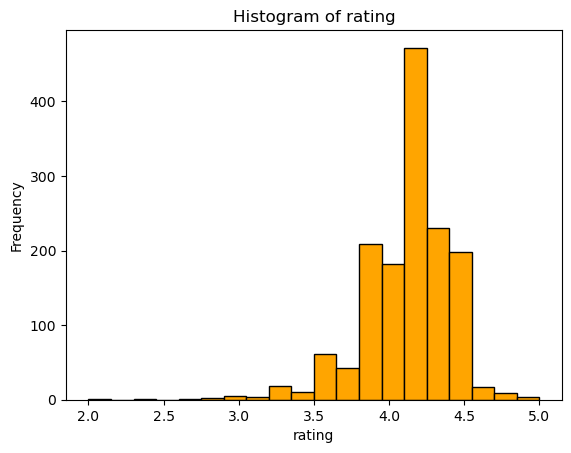

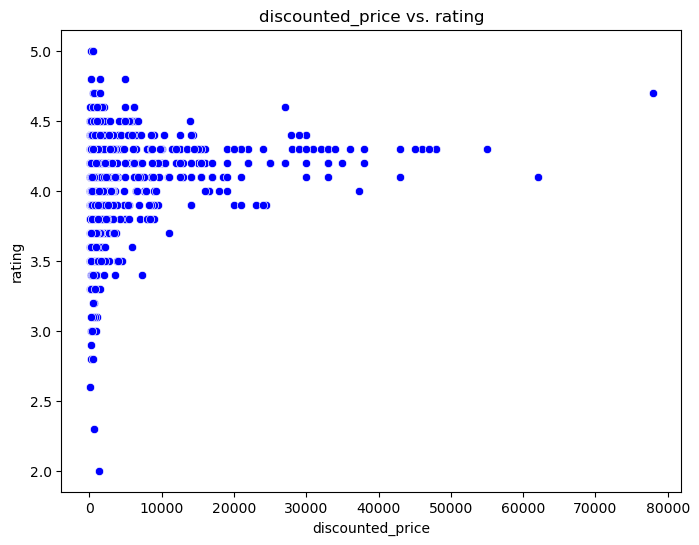

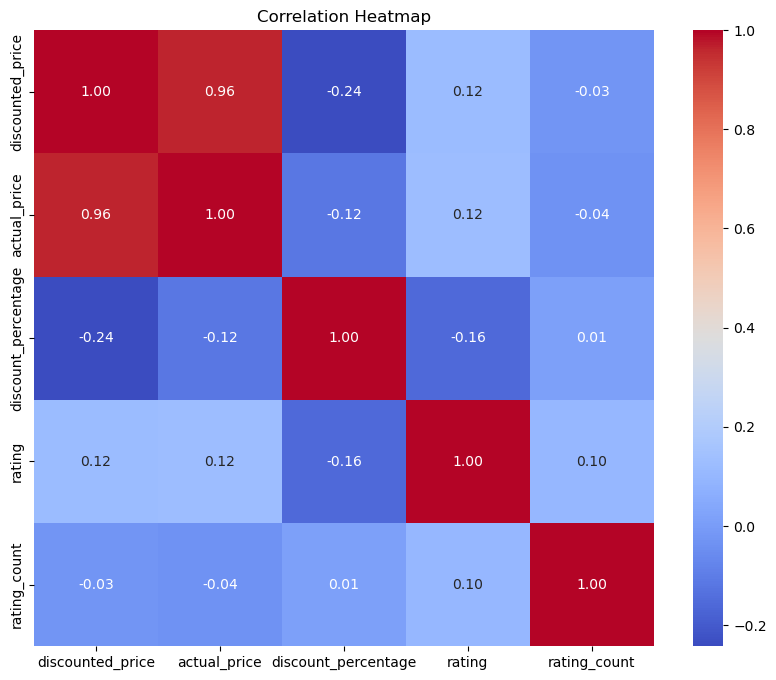

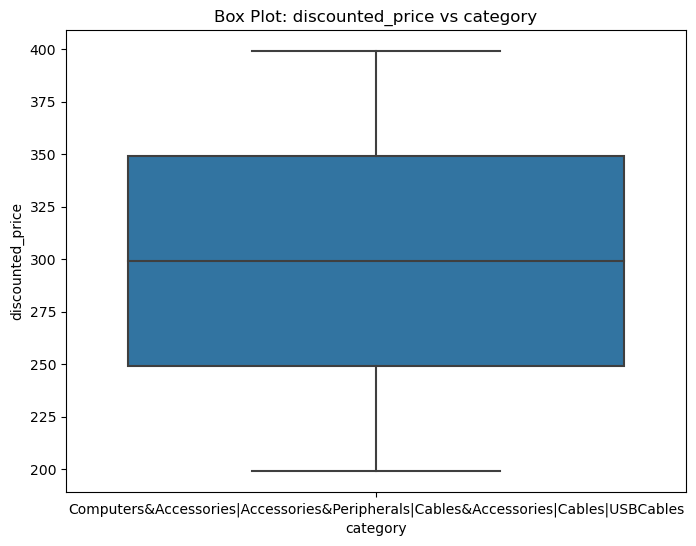

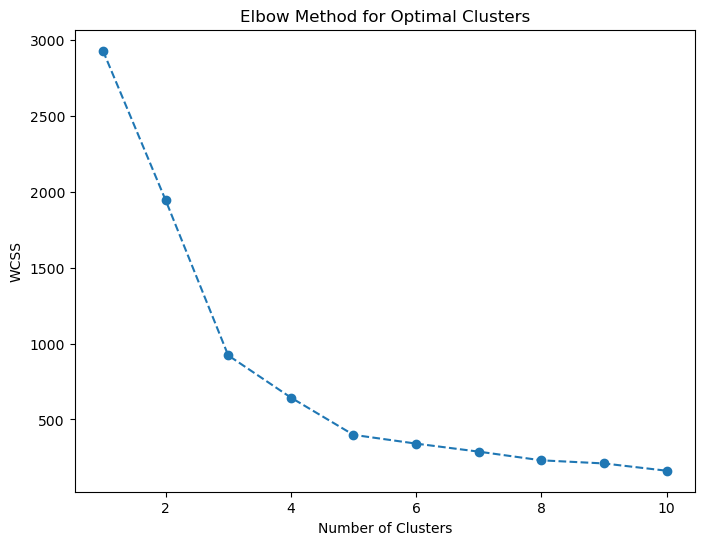

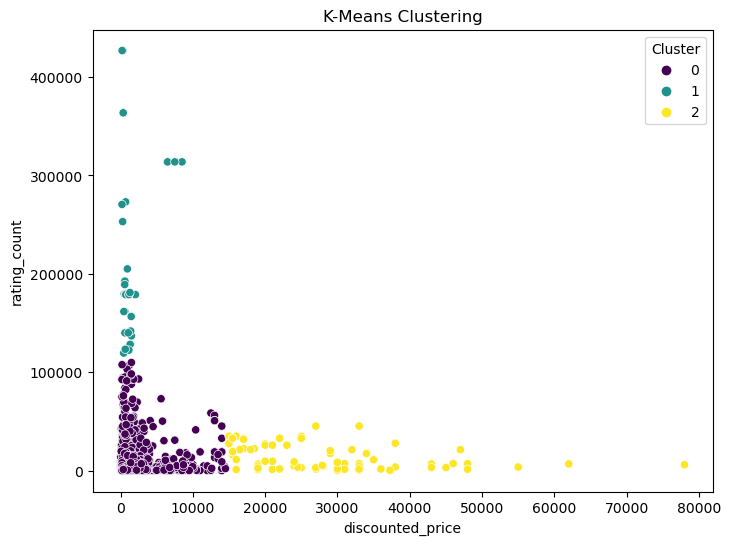

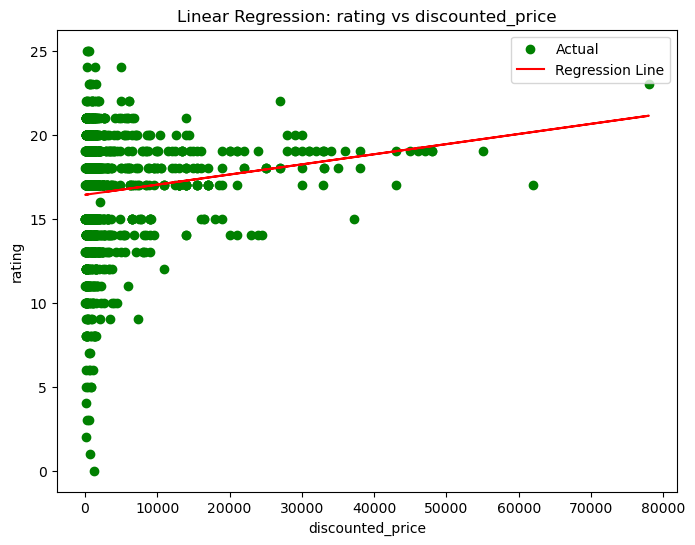

Coefficients: [[6.03509195e-05]]
Intercept: [16.41548018]
Mean Squared Error: 10.421322436750799
R² Score: 0.016563504148469743


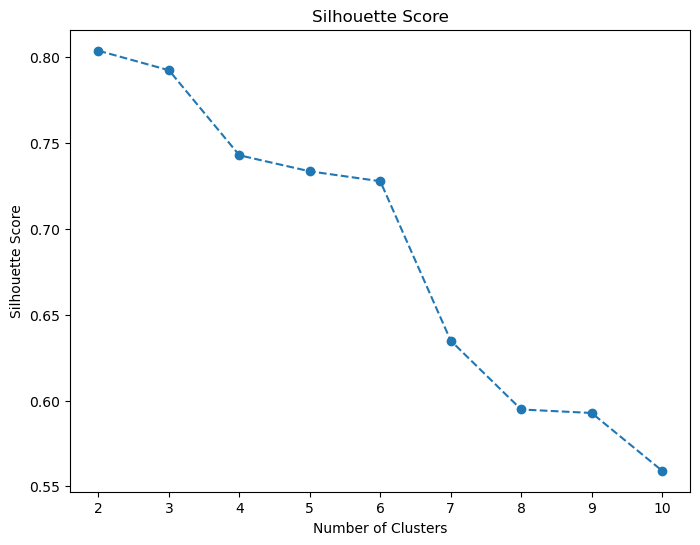

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("amazon.csv")

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Clean price columns (remove the '₹' symbol and convert to numeric)
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Clean 'discount_percentage' column (remove the '%' symbol and convert to numeric)
df['discount_percentage'] = df['discount_percentage'].replace({'%': ''}, regex=True).astype(float)

# Convert rating_count column to numeric, handling commas if present (e.g., '24,269' becomes 24269)
df['rating_count'] = df['rating_count'].replace({',': ''}, regex=True).astype(float)

# Convert 'rating' to numeric, as it is already in a valid format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Handle missing values by imputation (mean strategy) for numeric columns
imputer = SimpleImputer(strategy='mean')
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']] = imputer.fit_transform(
    df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']])

# Histogram function
def create_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, color='orange', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
create_histogram(df, 'rating', bins=20)

# Scatter plot function
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, color='blue')
    plt.title(f'{x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_scatter_plot(df, 'discounted_price', 'rating')

# Heatmap function
def create_heatmap(data):
    numeric_data = data.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
create_heatmap(df)

# Box plot function
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(f'Box Plot: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_box_plot(df.head(2), 'category', 'discounted_price')

# K-Means Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# Example usage
kmeans_clustering(df, ['discounted_price', 'rating_count'])

# Linear Regression
def linear_regression_fit(data, x_column, y_column):
    # Handle missing values for features
    imputer = SimpleImputer(strategy='mean')
    X = data[[x_column]].values
    y = data[y_column].values
    
    # Impute missing values for features
    X_imputed = imputer.fit_transform(X)

    # Encode categorical target variable 'y'
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Convert categorical target to numeric

    # Impute missing values for the target variable (after encoding)
    y_imputed = imputer.fit_transform(y_encoded.reshape(-1, 1))  # Impute missing target values
    
    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)

    # Predictions
    y_pred = model.predict(X_imputed)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_imputed, y_imputed, color='green', label='Actual')
    plt.plot(X_imputed, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y_imputed, y_pred)}')
    print(f'R² Score: {r2_score(y_imputed, y_pred)}')

# Example usage
linear_regression_fit(df, 'discounted_price', 'rating')

# Silhouette Score Plot
def plot_silhouette_score(data, features, max_clusters=10):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Example usage
plot_silhouette_score(df, ['discounted_price', 'rating_count'])


In [3]:
#Descriptive Statistics
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,Cluster
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353,0.137884
std,6944.304394,10874.826864,21.635905,0.291574,42724.651512,0.477748
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000,0.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000,0.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17394.000000,0.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,2.000000


In [4]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120337      0.121639            -0.155261   
rating_count                -0.027258     -0.036133             0.011676   
Cluster                      0.781356      0.723337            -0.189569   

                       rating  rating_count   Cluster  
discounted_price     0.120337     -0.027258  0.781356  
actual_price         0.121639     -0.036133  0.723337  
discount_percentage -0.155261      0.011676 -0.189569  
rating               1.000000      0.101397  0.096550  
rating_count         0.101397      1.000000  0.267660  
Cluster              0.096550      0.267660  1.000000  
